In [1]:
# pip install praw
# !pip install emoji
# !pip install deep_translator
# !pip install langdetect

In [17]:
# Importing Libraries
import praw
import csv
from datetime import datetime
import os
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
from deep_translator import GoogleTranslator
from langdetect import detect
import re

**Version Check**

In [3]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)

Pandas version: 2.0.3
NumPy version: 1.24.4
matplotlib version: 3.7.2
seaborn version: 0.12.2


**1st Version**

Pandas version: 2.0.3

NumPy version: 1.24.4

matplotlib version: 3.7.2

seaborn version: 0.12.2

# Extracting Reddit Data

In [4]:
# # Importing Libraries
# import praw
# import csv
# from datetime import datetime
# import os
# from tqdm import tqdm
# import time
# import warnings
# warnings.filterwarnings('ignore')

# # Filling reddit api credentials 
# client_id = 'QL8pAnDmsWBGG4Mr3JBmUQ'
# client_secret = 'gE-FO4x_vE4W90JuN-jfYC2SumC_0A'
# user_agent = 'mental_health_project by /u/your_reddit_username'

# # Initializing Reddit API
# reddit = praw.Reddit(client_id=client_id,
#                      client_secret=client_secret,
#                      user_agent=user_agent)

# # Setting output file and folder 
# current_dir = os.getcwd()  # Compatible with Jupyter and scripts
# output_dir = os.path.join(current_dir, 'output')
# os.makedirs(output_dir, exist_ok=True)
# output_file = os.path.join(output_dir, 'reddit_mentalhealth_combined.csv')

# Function to extract reddit data by passing sub reddit and limit as parameters
# def extract_reddit_data(subreddit_name, limit=500):
#     subreddit = reddit.subreddit(subreddit_name)
#     data = []
#     post_count = 0

#     print(f"\n Extracting up to {limit} posts from r/{subreddit_name}...")
#     for post in tqdm(subreddit.new(limit=limit), desc=f"Posts r/{subreddit_name}"):
#         post_count += 1
#         data.append([
#             "post", post.id, "", str(post.author),
#             datetime.utcfromtimestamp(post.created_utc).isoformat(),
#             post.score, post.title, post.selftext,
#             post.subreddit.display_name,
#             post.link_flair_text, post.url, "",
#             post.upvote_ratio,
#             post.ups,       # Upvotes count
#             post.downs      # Downvotes count
#         ])

#         time.sleep(1.5) # adding delay

#         post.comments.replace_more(limit=0)
#         for comment in post.comments.list():
#             data.append([
#                 "comment", post.id, comment.id, str(comment.author),
#                 datetime.utcfromtimestamp(comment.created_utc).isoformat(),
#                 comment.score, "", comment.body,
#                 post.subreddit.display_name,
#                 "", "", comment.parent_id,
#                 "",            # no upvote_ratio for comments
#                 comment.ups,   # Upvotes count
#                 comment.downs  # Downvotes count
#             ])

#     return data, post_count

# Function to save to csv file
# def save_to_csv(data, filename):
#     with open(filename, mode='w', encoding='utf-8', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerow([
#             "type", "post_id", "comment_id", "author", "created_utc", "score",
#             "title", "text", "subreddit", "flair", "url", "parent_id",
#             "upvote_ratio", "upvotes", "downvotes"
#         ])
#         writer.writerows(data)
#     print(f"\n Data saved to: {filename}")

# # Main script logic
# total_posts_needed = 10000
# subreddits = [
#     'depression', 'anxiety', 'mentalhealth', 'SuicideWatch', 'depression_help',
#     'offmychest', 'TrueOffMyChest', 'confession', 'lonely', 'socialanxiety',
#     'BPD', 'ADHD', 'PTSD', 'OCD', 'decidingtobebetter',
#     'KindVoice', 'therapy', 'CPTSD'
# ]

# num_subs = len(subreddits)
# chunk_limit = total_posts_needed // num_subs

# total_posts_collected = 0
# all_data = []

# for sub in subreddits:
#     if total_posts_collected >= total_posts_needed:
#         break

#     remaining = total_posts_needed - total_posts_collected
#     limit_for_sub = min(chunk_limit, remaining)

#     sub_data, posts_fetched = extract_reddit_data(sub, limit=limit_for_sub)
#     all_data.extend(sub_data)
#     total_posts_collected += posts_fetched

#     print(f" Collected {total_posts_collected} posts so far...")

# # Saving final dataset
# save_to_csv(all_data, output_file)

**Output**

# Data Visualization

**Loading CSV file**

In [5]:
# Getting current working directory
current_dir = os.getcwd()

# Defining path to 'output' folder
output_dir = os.path.join(current_dir, 'output')

# Defining full path to the CSV file
output_file = os.path.join(output_dir, 'reddit_mentalhealth_combined.csv')

# Loading CSV using pandas
df = pd.read_csv(output_file)

# Previewing the first few rows
print(df.head())

   type  post_id comment_id                author          created_utc  score  \
0  post  1lf4g6e        NaN  Medical-Teaching-405  2025-06-19T07:11:08      1   
1  post  1lf4emr        NaN      Ok-Broccoli-1906  2025-06-19T07:08:25      1   
2  post  1lf4bx2        NaN        AsideSuper7951  2025-06-19T07:03:32      1   
3  post  1lf4bva        NaN  Glass_Marionberry_33  2025-06-19T07:03:27      1   
4  post  1lf48hv        NaN              Bannatan  2025-06-19T06:57:44      1   

                                               title  \
0                   Life isn't quite what I expected   
1                    Why can't things just be right?   
2  Is there anything at all to do with life becom...   
3  Feeling really alone, just need someone kind t...   
4                                I m so numb CW vent   

                                                text   subreddit flair  \
0  Hello, I've been in a dark place for the last ...  depression   NaN   
1  Literally nothing at all 

In [6]:
# Counting number of posts
num_posts = df[df['type'] == 'post'].shape[0]
print("Number of posts:", num_posts)

Number of posts: 9990


In [7]:
# Post with highest upvotes
highest_upvote_post = df.loc[df['upvotes'].idxmax()]
print("Post with Highest Upvotes:")
print(highest_upvote_post[['upvotes', 'downvotes', 'author', 'title', 'text', 'url']])
print("\n")

# Post with highest downvotes
highest_downvote_post = df.loc[df['downvotes'].idxmax()]
print("Post with Highest Downvotes:")
print(highest_downvote_post[['upvotes', 'downvotes', 'author', 'title', 'text', 'url']])


Post with Highest Upvotes:
upvotes                                                  21076
downvotes                                                    0
author                                         maximum_squeeze
title        I tell work I'm bringing my lunch allowance ho...
text         I 24(f) noticed sometime last year that my wif...
url          https://www.reddit.com/r/confession/comments/1...
Name: 30297, dtype: object


Post with Highest Downvotes:
upvotes                                                      1
downvotes                                                    0
author                                    Medical-Teaching-405
title                         Life isn't quite what I expected
text         Hello, I've been in a dark place for the last ...
url          https://www.reddit.com/r/depression/comments/1...
Name: 0, dtype: object


In [8]:
# Sorting by upvotes descending
sorted_by_upvotes = df.sort_values(by='upvotes', ascending=False)

# Displaying top 5 rows
print("Top 5 posts by upvotes:")
print(sorted_by_upvotes[['upvotes', 'downvotes', 'author', 'title', 'url']].head())


Top 5 posts by upvotes:
       upvotes  downvotes                author  \
30297    21076          0       maximum_squeeze   
37612    12804          0        Charlesian2000   
16895     9859          0                 tmsaw   
37613     8023          0                   NaN   
46185     7964          0  WeddingCharacter3713   

                                                   title  \
30297  I tell work I'm bringing my lunch allowance ho...   
37612  I am not really human anymore, due to permanen...   
16895                                                NaN   
37613                                                NaN   
46185                                                NaN   

                                                     url  
30297  https://www.reddit.com/r/confession/comments/1...  
37612  https://www.reddit.com/r/confession/comments/1...  
16895                                                NaN  
37613                                                NaN  
46185        

In [9]:
# Sorting by downvotes descending
sorted_by_downvotes = df.sort_values(by='downvotes', ascending=False)

# Displaying top 5 rows
print("Top 5 posts by downvotes:")
print(sorted_by_downvotes[['upvotes', 'downvotes', 'author', 'title', 'url']].head())


Top 5 posts by downvotes:
       upvotes  downvotes                author  \
0            1          0  Medical-Teaching-405   
70872        7          0     dontreachforme666   
70882        1          0    Gullible-Book-9433   
70881        1          0  Appropriate-Use-3883   
70880        2          0           -_-Hammy-_-   

                                  title  \
0      Life isn't quite what I expected   
70872                               NaN   
70882                               NaN   
70881                               NaN   
70880                               NaN   

                                                     url  
0      https://www.reddit.com/r/depression/comments/1...  
70872                                                NaN  
70882                                                NaN  
70881                                                NaN  
70880                                                NaN  


**Upvotes vs. Downvotes Distribution**

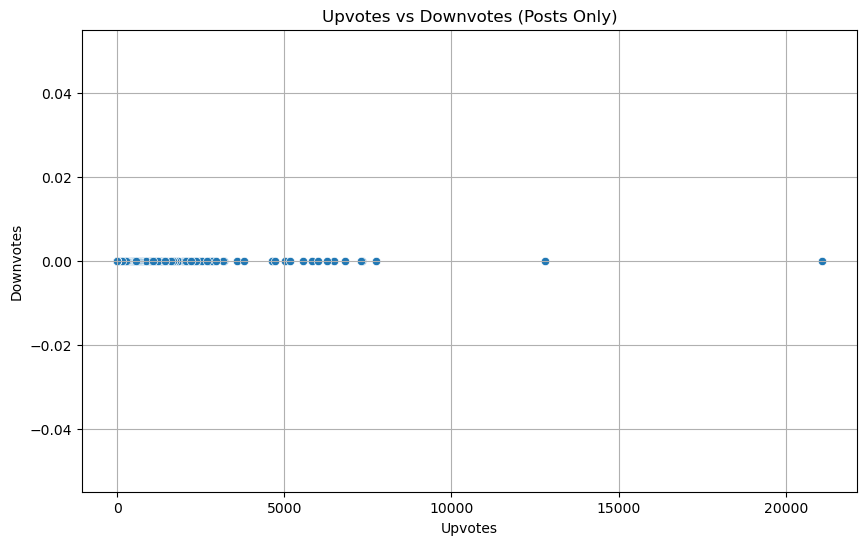

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['type'] == 'post'], x='upvotes', y='downvotes')
plt.title('Upvotes vs Downvotes (Posts Only)')
plt.xlabel('Upvotes')
plt.ylabel('Downvotes')
plt.grid(True)
plt.show()

**Top Authors by Total Upvotes**

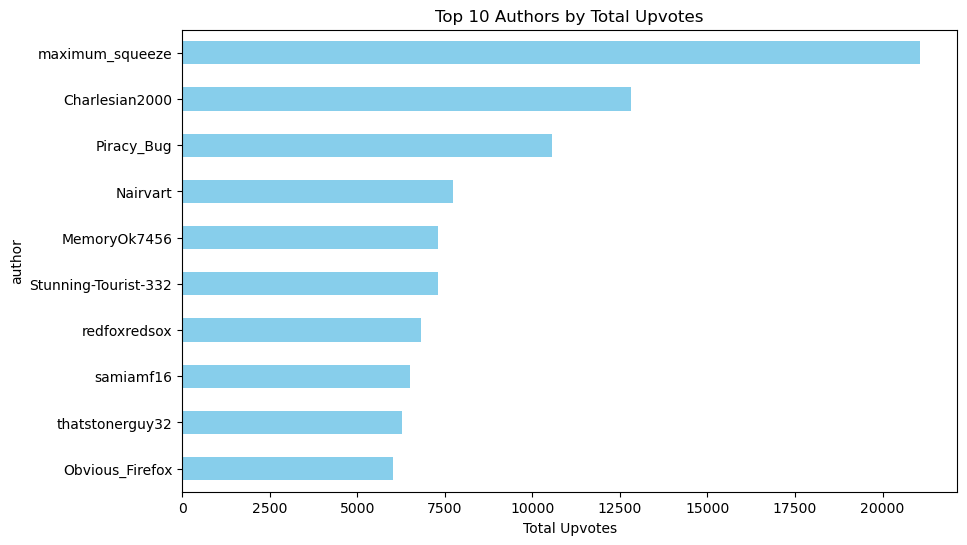

In [11]:
top_authors = df[df['type'] == 'post'].groupby('author')['upvotes'].sum().sort_values(ascending=False).head(10)

top_authors.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Authors by Total Upvotes')
plt.xlabel('Total Upvotes')
plt.gca().invert_yaxis()
plt.show()


**Post Count by Subreddit**

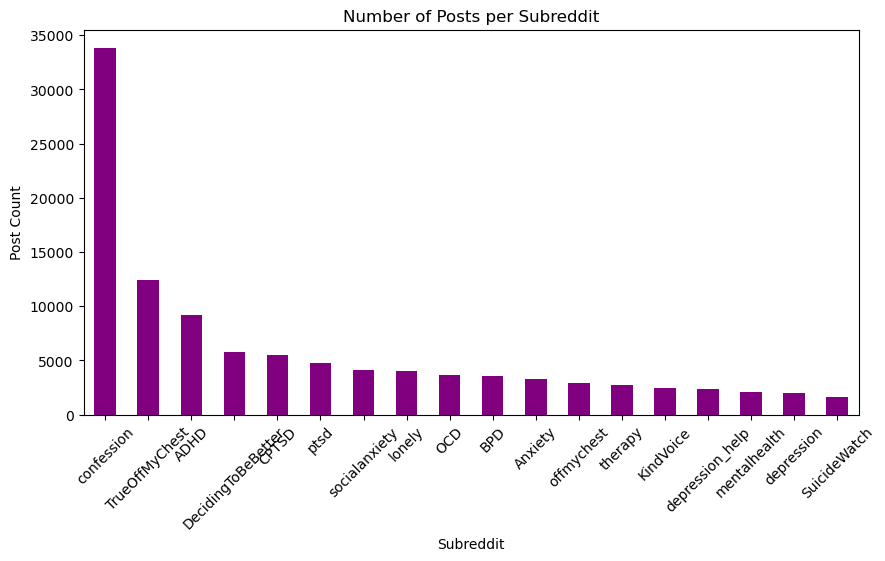

In [12]:
df['subreddit'].value_counts().plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Number of Posts per Subreddit')
plt.ylabel('Post Count')
plt.xlabel('Subreddit')
plt.xticks(rotation=45)
plt.show()


**Time Series of Posts per Day**

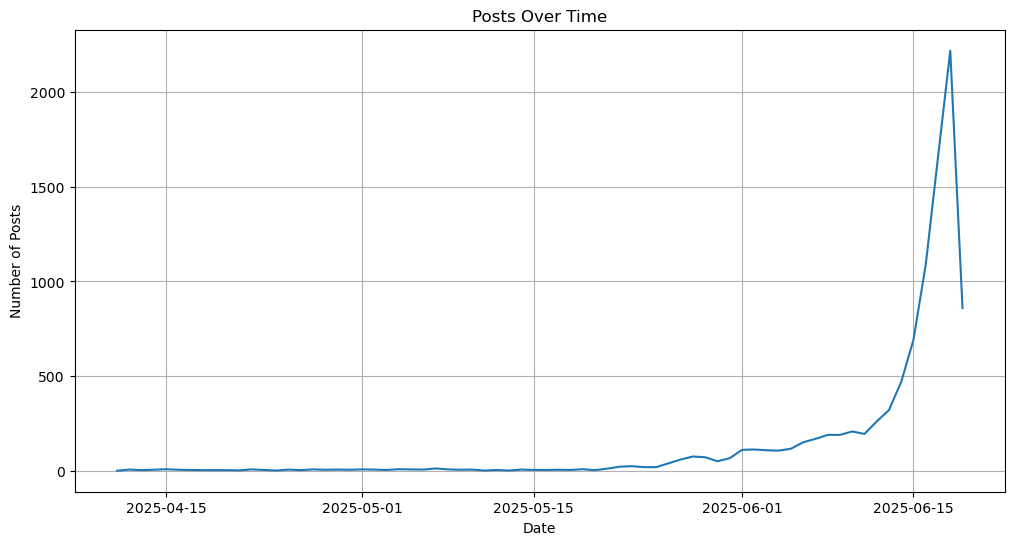

In [13]:
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['date'] = df['created_utc'].dt.date
daily_counts = df[df['type'] == 'post'].groupby('date').size()

daily_counts.plot(kind='line', figsize=(12, 6))
plt.title('Posts Over Time')
plt.ylabel('Number of Posts')
plt.xlabel('Date')
plt.grid(True)
plt.show()


**Upvote Ratio Distribution**

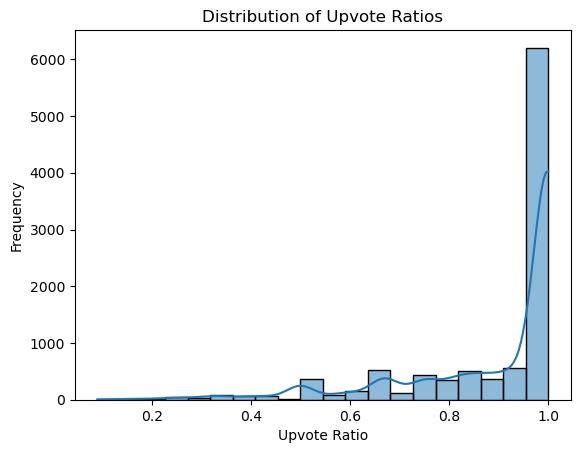

In [14]:
sns.histplot(df['upvote_ratio'], bins=20, kde=True)
plt.title('Distribution of Upvote Ratios')
plt.xlabel('Upvote Ratio')
plt.ylabel('Frequency')
plt.show()


# Data Pre-Processing

In [15]:
import pandas as pd
import os
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# OPTIONAL: Download NLTK resources (only once)
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

# 1. Replace NaN with space, convert to string, strip spaces
df['title'] = df['title'].fillna(' ').astype(str).str.strip()
df['text'] = df['text'].fillna(' ').astype(str).str.strip()

# 2. Remove rows where:
# - title is NaN
# - OR text is NaN, 'removed', or ''
df = df[~(
    df['title'].isna() |
    df['text'].isna() |
    df['text'].str.strip().str.lower().isin(['removed', ''])
)]

# 3. Truncate text to 300 words
def truncate_to_300_words(text):
    words = str(text).split()
    return ' '.join(words[:300])

df['text'] = df['text'].apply(truncate_to_300_words)

# 4. Setup stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# 5. Correct emoji detection function (for emoji >= 2.0)
def is_emoji(s):
    return emoji.is_emoji(s)

# 6. Function to strip accents but keep emojis
def strip_accents(text):
    text = unicodedata.normalize('NFD', text)
    return ''.join(ch for ch in text if not unicodedata.combining(ch))

# 7. Clean text but keep emojis and remove accents
def clean_text(text):
    text = str(text).lower()
    text = strip_accents(text)
    tokens = word_tokenize(text)
    cleaned = [
        word for word in tokens
        if word not in stop_words and word not in punctuation and (word.isalpha() or is_emoji(word))
    ]
    return ' '.join(cleaned)

# 8. Apply cleaning to title and text
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)

# 9. Save cleaned file
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)
cleaned_file = os.path.join(output_dir, 'reddit_cleaned_tokenized.csv')
df.to_csv(cleaned_file, index=False)

print(f"Cleaned and tokenized file saved to: {cleaned_file}")

Cleaned and tokenized file saved to: output\reddit_cleaned_tokenized.csv


**Checking any other noises (except text)**

In [20]:
# Function to extract unique non-a-z characters from text
def extract_nonaz_chars(text):
    return re.findall(r'[^a-z\s]', str(text).lower())

# Apply to title and text
df['title_nonaz_chars'] = df['title'].apply(extract_nonaz_chars)
df['text_nonaz_chars'] = df['text'].apply(extract_nonaz_chars)

# Optional: Flatten and count frequency of non-a-z characters across all titles and texts
from collections import Counter

all_title_chars = [char for sublist in df['title_nonaz_chars'] for char in sublist]
all_text_chars = [char for sublist in df['text_nonaz_chars'] for char in sublist]

title_char_counts = Counter(all_title_chars)
text_char_counts = Counter(all_text_chars)

# Show top 10 most common non-a-z characters
print("🔤 Top non-a-z characters in titles:", title_char_counts.most_common(10))
print("🔤 Top non-a-z characters in text:", text_char_counts.most_common(10))


🔤 Top non-a-z characters in titles: [('и', 10), ('😭', 8), ('ي', 7), ('ا', 6), ('а', 6), ('️', 5), ('ل', 5), ('ه', 5), ('م', 4), ('💔', 4)]
🔤 Top non-a-z characters in text: [('️', 1110), ('😂', 608), ('❤', 589), ('😭', 498), ('\u200d', 342), ('ا', 286), ('🤣', 283), ('😅', 258), ('🤷', 226), ('ل', 190)]


**Unicode noises**

                          title  \
129  since kidnapped life sucks   
353                         nan   
419                        gave   
470      dealing eating attacks   
619                         nan   

                                                  text  
129  life absolute shit since suffered kidnapping h...  
353          cant even leave house thanks í appreciate  
419  dont want nothing anymore life á nightmare bul...  
470  summer worst time year mother grandfather gran...  
619  yea also different fruit purées prefer kinda l..

In [ ]:
# # OPTIONAL: Download NLTK resources (only once)
# # import nltk
# # nltk.download('punkt')
# # nltk.download('stopwords')

# # 0. Functions for language detection and translation caching
# translation_cache = {}

# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return 'unknown'

# def translate_to_english_cached(text):
#     if text in translation_cache:
#         return translation_cache[text]
#     try:
#         translated = GoogleTranslator(source='auto', target='en').translate(text)
#         translation_cache[text] = translated
#         return translated
#     except:
#         return text  # fallback to original if translation fails

# # 1. Replace NaN with space, convert to string, strip spaces
# df['title'] = df['title'].fillna(' ').astype(str).str.strip()
# df['text'] = df['text'].fillna(' ').astype(str).str.strip()

# # 2. Remove rows where:
# # - title is NaN
# # - OR text is NaN, 'removed', or ''
# df = df[~(
#     df['title'].isna() |
#     df['text'].isna() |
#     df['text'].str.strip().str.lower().isin(['removed', ''])
# )]

# # 3. Truncate text to 300 words
# def truncate_to_300_words(text):
#     words = str(text).split()
#     return ' '.join(words[:300])

# df['text'] = df['text'].apply(truncate_to_300_words)

# # 4. Detect and translate only non-English rows
# df['lang_title'] = df['title'].apply(detect_language)
# df['lang_text'] = df['text'].apply(detect_language)

# df.loc[df['lang_title'] != 'en', 'title'] = df.loc[df['lang_title'] != 'en', 'title'].apply(translate_to_english_cached)
# df.loc[df['lang_text'] != 'en', 'text'] = df.loc[df['lang_text'] != 'en', 'text'].apply(translate_to_english_cached)

# # 5. Setup stop words and punctuation
# stop_words = set(stopwords.words('english'))
# punctuation = set(string.punctuation)

# # 6. Updated helper function to detect emojis
# def is_emoji(s):
#     return emoji.is_emoji(s)

# # 7. Function to strip accents but keep emojis
# def strip_accents(text):
#     text = unicodedata.normalize('NFD', text)
#     return ''.join(ch for ch in text if not unicodedata.combining(ch))

# # 8. Clean text but keep emojis and remove accents
# def clean_text(text):
#     text = str(text).lower()
#     text = strip_accents(text)
#     tokens = word_tokenize(text)
#     cleaned = [
#         word for word in tokens
#         if word not in stop_words and word not in punctuation and (word.isalpha() or is_emoji(word))
#     ]
#     return ' '.join(cleaned)

# # 9. Apply cleaning to title and text
# df['title'] = df['title'].apply(clean_text)
# df['text'] = df['text'].apply(clean_text)

# # 10. Save cleaned file
# output_dir = "output"
# os.makedirs(output_dir, exist_ok=True)
# cleaned_file = os.path.join(output_dir, 'reddit_cleaned_tokenized.csv')
# df.to_csv(cleaned_file, index=False)

# print(f"Cleaned and tokenized file saved to: {cleaned_file}")
